### Key - Homework 5: Volcano Data

2/17/18

In [63]:
# Import libs:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [64]:
Mau_Data = np.genfromtxt('./mauna_loa_weekly.csv')

In [65]:
# Organize the different columns into separate lists:
years = Mau_Data[:,0]
month = Mau_Data[:,1]
day = Mau_Data[:,2]
co2 = Mau_Data[:,3]

<IPython.core.display.Javascript object>


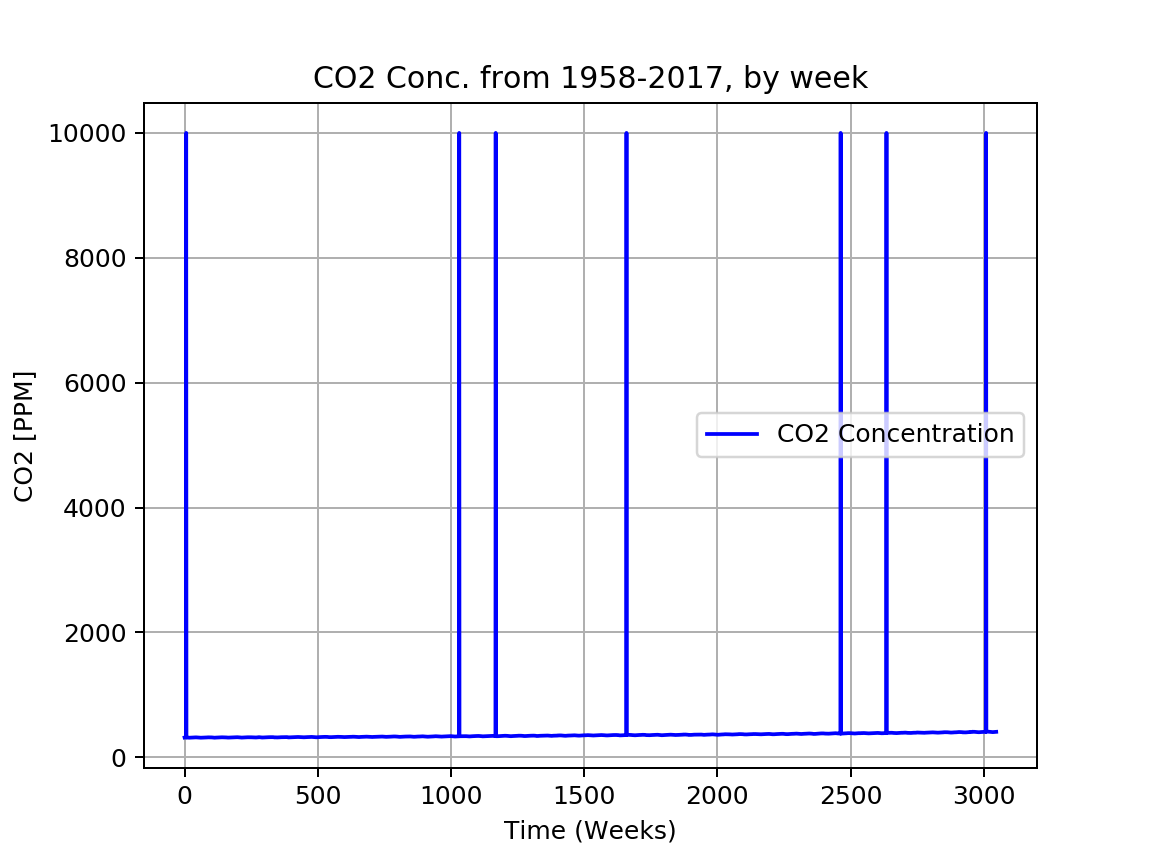

In [66]:
plt.figure()
plt.grid()
plt.plot(co2, 'b-')
plt.xlabel('Time (Weeks)')
plt.ylabel('CO2 [PPM]')
plt.title('CO2 Conc. from 1958-2017, by week')
plt.legend(['CO2 Concentration'])

We notice immediately that CO2 concentration has spiked massively from the baseline, which we are told corresponds to times when the measuring device was undergoing maintenance. To smooth the data, we want to go through and remove these values, replacing them with the previous measured value.

In [41]:
def replace_value(lst, to_remove):
    for i in range(1,len(lst)):         #Note: we start at 1 here rather than 0, because we can't replace the 0th value, as it has nothing before it
        if lst[i] == to_remove:
            lst[i] = lst[i-1]
    
    return lst  # Return the transformed list
        

# variables to pass into the function above:
to_remove = 9999  # Value device records during maintenance
lst = co2

co2 = replace_value(lst, to_remove)


In [42]:
# Just a quick sanity check; did we remove all the 9999's?
9999 in co2

False

Let's plot the data again, now that we've removed the outliers:

<IPython.core.display.Javascript object>


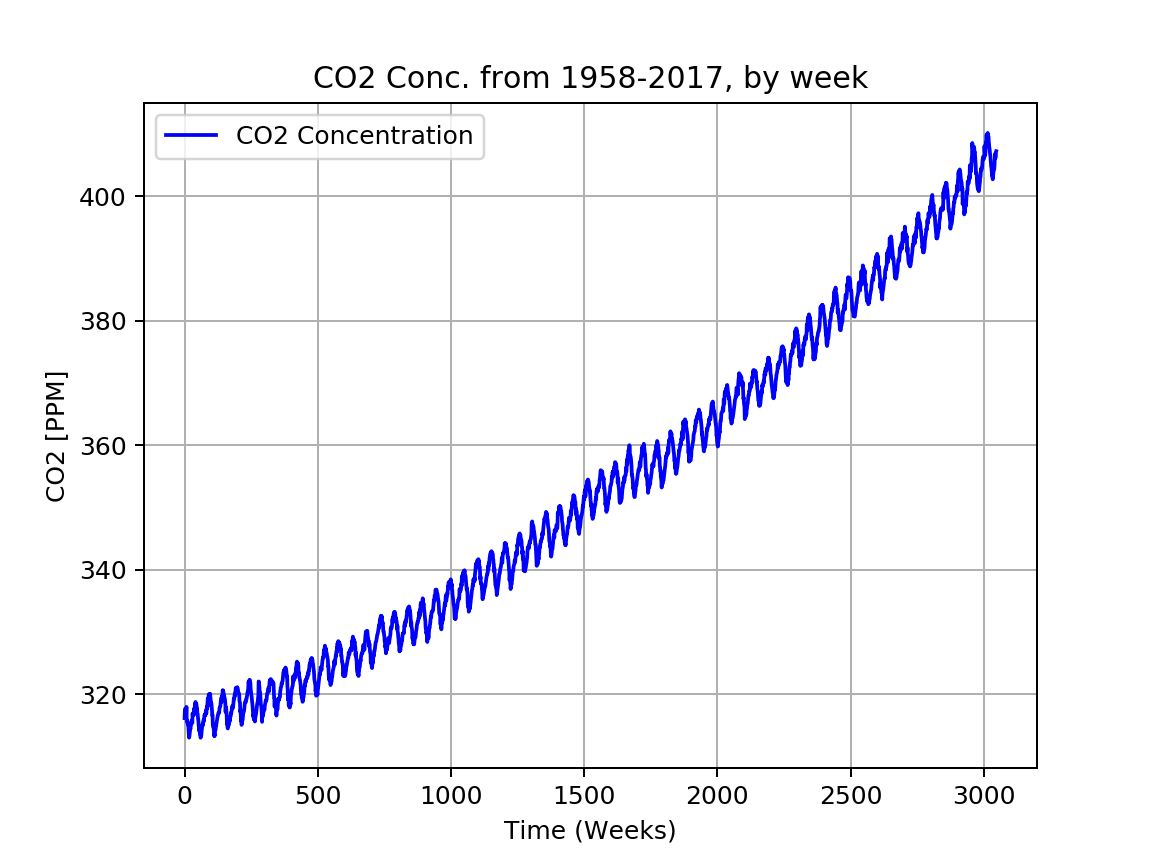

In [45]:
plt.figure()
plt.grid()
plt.plot(co2, 'b-')
plt.xlabel('Time (Weeks)')
plt.ylabel('CO2 [PPM]')
plt.title('CO2 Conc. from 1958-2017, by week')
plt.legend(['CO2 Concentration'])

To fit a best-fit line, we'll want to make use of our sum of least squares function, to perform linear regression:

In [53]:
# Create array of number of weeks:
x = np.arange(0,len(co2))

# Collect the means:
x_=np.mean(no_days)
y_=np.mean(co2)

# Calculate the slope and intercept:
slope = sum((x-x_)*(co2-y_))/sum((x-x_)**2)
incpt = y_-(slope*x_)

print('m:',slope, 'ppm CO2/week')
print('b:',incpt, 'ppm')

m: 0.0300440212836 ppm CO2/week
b: 307.669895517 ppm


In [54]:
# Calculate the linear regression values:
lof = [(i*slope)+incpt for i in x]

<IPython.core.display.Javascript object>


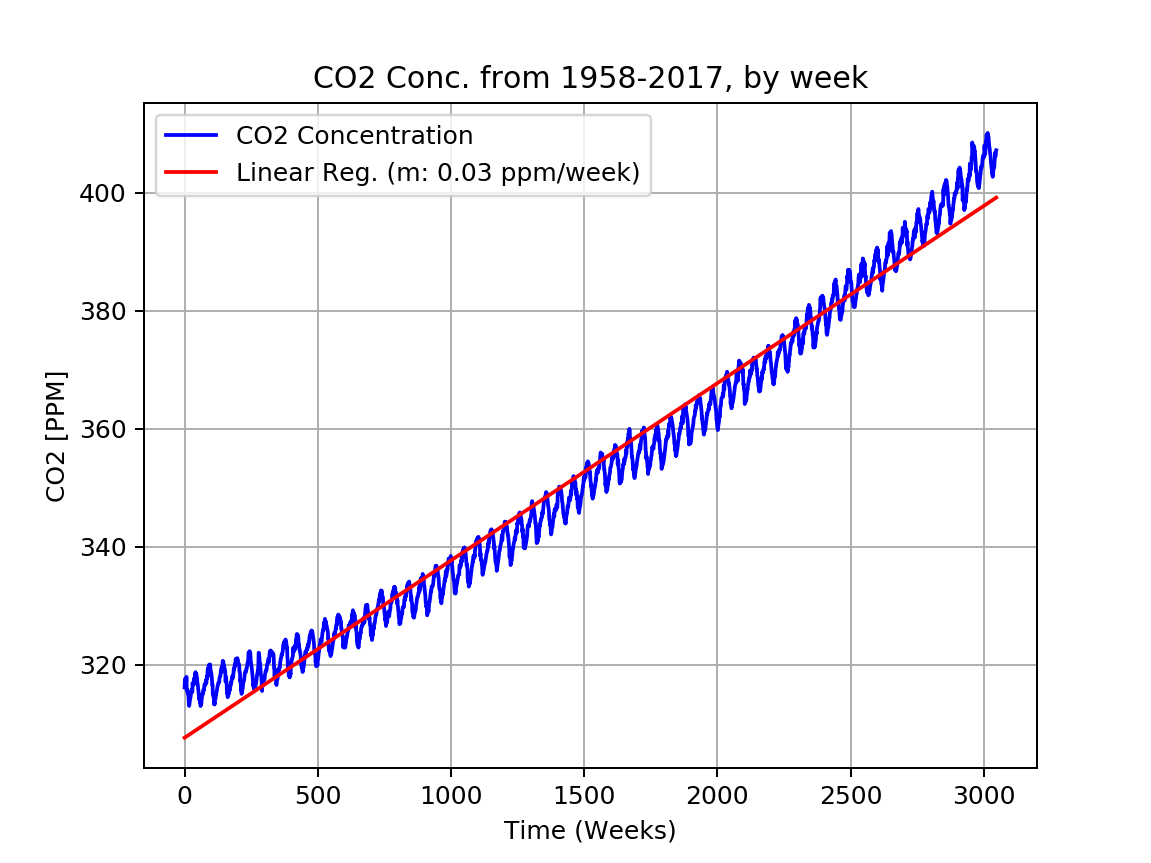

In [58]:
# Now add linear regression to the plot:
plt.figure()
plt.grid()
plt.plot(co2, 'b-')
plt.plot(lof,'r-')
plt.xlabel('Time (Weeks)')
plt.ylabel('CO2 [PPM]')
plt.title('CO2 Conc. from 1958-2017, by week')
plt.legend(['CO2 Concentration','Linear Reg. (m: 0.03 ppm/week)'])

We are asked to predict the CO2 conc. in 2050 based on our linear model; this means we need to convert 2050 to number of weeks from the start of our observations in 1958:

In [62]:
Time = (2050-1958)*52 # Difference in weeks between 1958 and 2050
Conc_prediction = incpt+slope*Time
print('Our model predicts that the CO2 conc. in 2050 will be',Conc_prediction,'ppm')

Our model predicts that the CO2 conc. in 2050 will be 451.400493337 ppm
